# Detectia obiectelor

<section>
  <h1>Object Detection — Introducere</h1>

  <p>
    <strong>Object Detection</strong> este o sarcină fundamentală în <em>Computer Vision</em> care vizează identificarea și localizarea obiectelor de interes într-o imagine sau într-un flux video.
    Spre deosebire de <em>image classification</em>, unde o singură etichetă (clasă) este atribuită întregii imagini, object detection presupune atât recunoașterea categoriei (clasei) fiecărui obiect, cât și indicarea poziției sale prin <em>bounding boxes</em> sau, în cazul <em>instance segmentation</em> / <em>semantic segmentation</em>, prin măști pixel-level.
  </p>

  <h2>Classical Approaches</h2>
  <p>
    Înainte de <em>deep learning</em>, metodele se bazau pe <strong>hand-crafted features</strong> și clasificatori tradiționali:
  </p>
  <ul>
    <li><strong>Sliding window detectors</strong> + clasificatori precum <em>SVM</em> sau <em>AdaBoost</em>, folosind
      <a href="https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf" target="_blank">HOG (Histogram of Oriented Gradients)</a>,
      <a href="https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf" target="_blank">SIFT</a> sau Haar-like features.
    </li>
    <li><strong>Viola–Jones</strong> (2001) pentru detecția fețelor în timp real.</li>
    <li>Pipeline-uri cu <em>feature extraction</em>, <em>dimensionality reduction</em> și clasificatori statistici.</li>
  </ul>
  <p>
    Aceste abordări oferă rezultate rezonabile pentru obiecte simple, dar se lovesc de variabilitatea formelor, condițiilor de iluminare și a scenelor aglomerate.
  </p>

  <h2>Deep Learning</h2>
  <p>
    Odată cu succesul <strong>Convolutional Neural Networks (CNNs)</strong> (după <a href="http://www.image-net.org/challenges/LSVRC/2012/" target="_blank">ImageNet 2012</a>), paradigma s-a schimbat:
  </p>
  <ul>
    <li><a href="https://arxiv.org/abs/1311.2524" target="_blank"><strong>R-CNN</strong> (2014)</a> — propuneri de regiuni generate separat, apoi <em>CNN</em> pentru clasificare.</li>
    <li><a href="https://arxiv.org/abs/1504.08083" target="_blank"><strong>Fast R-CNN</strong></a> &amp; <a href="https://arxiv.org/abs/1506.01497" target="_blank"><strong>Faster R-CNN</strong></a> — eficientizare prin integrarea <em>Region Proposal Network (RPN)</em>.</li>
    <li><a href="https://arxiv.org/abs/1506.02640" target="_blank"><strong>YOLO</strong> (You Only Look Once, 2016)</a> — reformulare ca problemă de regresie unică pentru <em>real-time</em>. <a href="https://github.com/pjreddie/darknet" target="_blank"><strong>YOLOv2</strong></a>, <a href="https://github.com/ultralytics/yolov3" target="_blank"><strong>YOLOv3</strong></a>, <a href="https://github.com/AlexeyAB/darknet" target="_blank"><strong>YOLOv4</strong></a>, <a href="https://github.com/ultralytics/yolov5" target="_blank"><strong>YOLOv5</strong></a>, <a href="https://github.com/ultralytics/ultralytics" target="_blank"><strong>YOLOv8</strong></a>. </li>
    <li><a href="https://arxiv.org/abs/1512.02325" target="_blank"><strong>SSD</strong> (Single Shot MultiBox Detector)</a> — alt <em>one-stage detector</em> cu echilibru viteză–acuratețe.</li>
    <li>Versiuni moderne, cu rafinamente arhitecturale pentru acuratețe și <em>inference speed</em>, includ: <a href="https://github.com/Deci-AI/super-gradients" target="_blank"><strong>YOLO-NAS</strong></a>, <a href="https://arxiv.org/abs/2203.03605" target="_blank"><strong>DINO</strong></a>,<a href="https://github.com/IDEA-Research/GroundingDINO" target="_blank"><strong>Grounding DINO</strong></a>.
</li>
  </ul>

  <h2>Attention-based Architectures</h2>
  <p>
    Integrarea <strong>attention mechanisms</strong> a adus o nouă schimbare de paradigmă:
  </p>
  <ul>
    <li><a href="https://arxiv.org/abs/2005.12872" target="_blank"><strong>DETR (Detection Transformer)</strong></a> — renunță la <em>anchors</em> și <em>region proposals</em>, formulând detecția ca <em>set prediction</em> direct.</li>
    <li><a href="https://arxiv.org/abs/2010.04159" target="_blank"><strong>Deformable DETR</strong></a> și arhitecturi hibride <em>CNN–Transformer</em> — îmbunătățiri de eficiență și scalabilitate.</li>
    <li>Attention oferă <em>global reasoning</em> și captează mai bine contextul și relațiile dintre obiecte în scene complexe.</li>
  </ul>

  <h2>Resurse utile</h2>
  <ul>
    <li><a href="https://pytorch.org/vision/stable/models.html#object-detection" target="_blank">TorchVision Object Detection Models</a></li>
    <li><a href="http://web.archive.org/web/20250428021428/https://paperswithcode.com/sota" target="_blank">Papers with Code Archieve</a></li>
  </ul>
</section>

## 0. Definirea problemei

În sarcinile de detecție a obiectelor trebuie să identificăm în
imagine obiectele de interes, să le "desenăm" un **bounding box** (o
cutie dreaptunghiulară) și să atribuim fiecărei cutii o etichetă de
clasă. Pe scurt, ne sunt oferite imagini și vrem să prezicem unde
sunt obiectele și ce tip de obiect reprezintă fiecare. În dataset‑ul
Oxford‑IIIT Pet fiecare imagine conține un singur animal, iar
informația de segmentare o putem transforma ușor într‑un singur
bounding box.

Vom începe prin a încărca dataset‑ul și a vizualiza o imagine cu
bounding box‑ul asociat. Observați că un bounding box este definit
prin coordonatele colțului stânga‑sus și colțului dreapta‑jos (vezi
secțiunea următoare pentru formate alternative).

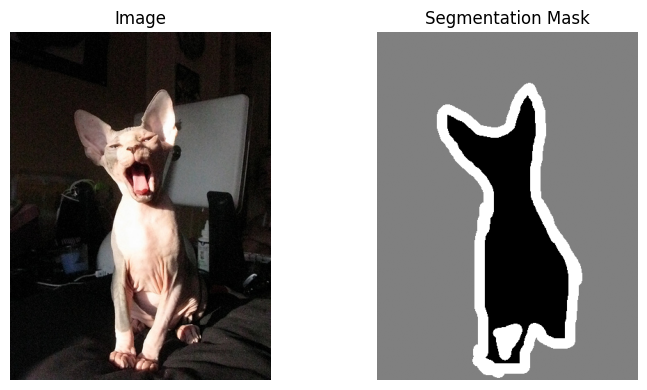

In [20]:

import torch
from torchvision import datasets, transforms
from torchvision.transforms.functional import pil_to_tensor
import matplotlib.pyplot as plt

import random

# Descărcăm setul de antrenare și transformăm imaginile pentru afișare.
dataset = datasets.OxfordIIITPet(
    root="/tmp/oxford_pets", split="trainval", target_types="segmentation",
    download=True
)

def show_image_and_mask(index):
    # Afișează imaginea și masca de segmentare
    img, seg = dataset[index]

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Imaginea originală
    axes[0].imshow(img)
    axes[0].set_title("Image")
    axes[0].axis('off')

    # Masca de segmentare
    axes[1].imshow(seg, cmap="gray")
    axes[1].set_title("Segmentation Mask")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

# Afișăm o imagine aleatorie ca exemplu
show_image_and_mask(random.randrange(len(dataset)))

[0, 0, 405, 305]


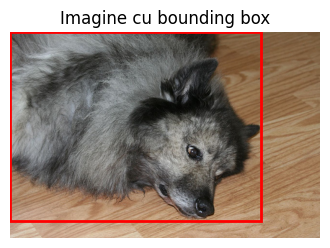

In [34]:
def extract_bbox(mask):
    # IDEE - EXERCITIU DE IMPLEMENTAT LA LABORATOR ---------------------------------------
    # Extrage bounding box-ul minimal care înconjoară toți pixelii pozitivi
    # dintr-o mască de segmentare. Returnează (xmin, ymin, xmax, ymax).
    # convertim la Tensor
    mask_tensor = pil_to_tensor(mask)[0]  # scoatem doar canalul
    ys, xs = torch.where(mask_tensor == 3)
    if len(xs) == 0:
        # nu există obiect
        return None
    xmin, xmax = xs.min().item(), xs.max().item()
    ymin, ymax = ys.min().item(), ys.max().item()
    return [xmin, ymin, xmax, ymax]

def show_image_with_bbox(index):
    # Afișează imaginea la poziția dată împreună cu bounding box-ul calculat.
    img, seg = dataset[index]
    bbox = extract_bbox(seg)
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    if bbox is not None:
        xmin, ymin, xmax, ymax = bbox
        # desenăm un dreptunghi roșu
        plt.gca().add_patch(
            plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                           fill=False, edgecolor='red', linewidth=2)
        )
    plt.title("Imagine cu bounding box")
    plt.axis('off')

# Afișăm o imagine aleatorie ca exemplu
show_image_with_bbox(random.randrange(len(dataset)))

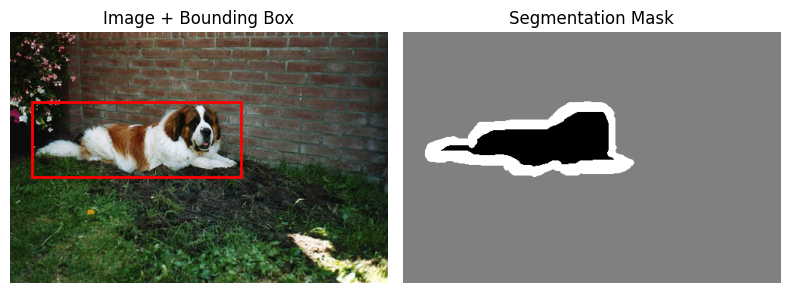

In [32]:
def show_image_with_bbox_and_mask(index):
    # Afișează imaginea + bounding box și masca de segmentare
    img, seg = dataset[index]
    bbox = extract_bbox(seg)

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # 1) Imagine + bbox
    axes[0].imshow(img)
    if bbox is not None:
        xmin, ymin, xmax, ymax = bbox
        axes[0].add_patch(
            plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                          fill=False, edgecolor='red', linewidth=2)
        )
    axes[0].set_title("Image + Bounding Box")
    axes[0].axis('off')

    # 2) Masca de segmentare
    axes[1].imshow(seg, cmap="gray")
    axes[1].set_title("Segmentation Mask")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

# Afișăm o imagine aleatorie ca exemplu
show_image_with_bbox_and_mask(random.randrange(len(dataset)))

## 1. Formate de bounding box

<p>
Un <strong>bounding box</strong> poate fi reprezentat în mai multe moduri, în funcție de dataset sau algoritm.
Cele mai întâlnite sunt:
</p>

<ol>
  <li>
    <strong>Pascal VOC</strong> — format <em>Top-Left/Bottom-Right (TLBR)</em>.<br>
    Reprezentare: <code>(x_min, y_min, x_max, y_max)</code> în pixeli.<br>
  </li>
  <li>
    <strong>COCO</strong> — format <em>Top-Left/Width/Height (TLWH)</em>.<br>
    Reprezentare: <code>(x_min, y_min, width, height)</code> în pixeli.<br>
  </li>
  <li>
    <strong>YOLO</strong> — format <em>Center/Width/Height (CWH)</em>.<br>
    Reprezentare: <code>(x_center, y_center, width, height)</code>, toate valorile
    sunt <strong>normalizate</strong> între 0 și 1 prin împărțirea la lățimea și înălțimea imaginii.<br>
    Exemplele YOLO din fișierele <code>.txt</code> sunt deja normalizate.
  </li>
</ol>

<p>
Astfel, Pascal VOC și COCO lucrează implicit în pixeli, iar normalizarea are loc
în timpul preprocesării pentru antrenare. YOLO, în schimb, stochează direct
coordonatele normalizate în [0,1].
</p>

<p>
<font color="red"><b>❓ Ce format de bounding box folosim noi în acest moment?</b></font>
</p>

In [36]:
# -------- Pascal VOC <-> COCO --------

# De implementat cateva de aici # ---------------------------------------
def pascalvoc_to_coco(box):
    """[xmin, ymin, xmax, ymax] -> [xmin, ymin, w, h]"""
    xmin, ymin, xmax, ymax = box
    return [xmin, ymin, xmax - xmin, ymax - ymin]

def coco_to_pascalvoc(box):
    """[xmin, ymin, w, h] -> [xmin, ymin, xmax, ymax]"""
    xmin, ymin, w, h = box
    return [xmin, ymin, xmin + w, ymin + h]

# -------- Pascal VOC <-> YOLO --------
def pascalvoc_to_yolo(box, img_w, img_h):
    """[xmin, ymin, xmax, ymax] -> [x_center/img_w, y_center/img_h, w/img_w, h/img_h]"""
    xmin, ymin, xmax, ymax = box
    w = xmax - xmin
    h = ymax - ymin
    x_center = xmin + w / 2.0
    y_center = ymin + h / 2.0
    return [x_center / img_w, y_center / img_h, w / img_w, h / img_h]

def yolo_to_pascalvoc(box, img_w, img_h):
    """[x_center/img_w, y_center/img_h, w/img_w, h/img_h] -> [xmin, ymin, xmax, ymax]"""
    x_center, y_center, w, h = box
    x_center *= img_w
    y_center *= img_h
    w *= img_w
    h *= img_h
    xmin = x_center - w / 2.0
    ymin = y_center - h / 2.0
    xmax = x_center + w / 2.0
    ymax = y_center + h / 2.0
    return [xmin, ymin, xmax, ymax]

# -------- COCO <-> YOLO --------
def coco_to_yolo(box, img_w, img_h):
    """[xmin, ymin, w, h] -> [x_center/img_w, y_center/img_h, w/img_w, h/img_h]"""
    xmin, ymin, w, h = box
    x_center = xmin + w / 2.0
    y_center = ymin + h / 2.0
    return [x_center / img_w, y_center / img_h, w / img_w, h / img_h]

def yolo_to_coco(box, img_w, img_h):
    """[x_center/img_w, y_center/img_h, w/img_w, h/img_h] -> [xmin, ymin, w, h]"""
    x_center, y_center, w, h = box
    x_center *= img_w
    y_center *= img_h
    w *= img_w
    h *= img_h
    xmin = x_center - w / 2.0
    ymin = y_center - h / 2.0
    return [xmin, ymin, w, h]

In [37]:
img, seg = dataset[0]
w, h = img.size
bbox_voc = extract_bbox(seg)

print("Pascal VOC:", bbox_voc)
print("COCO:", pascalvoc_to_coco(bbox_voc))
print("YOLO:", pascalvoc_to_yolo(bbox_voc, w, h))

# reconversie YOLO -> COCO
bbox_yolo = pascalvoc_to_yolo(bbox_voc, w, h)
print("YOLO -> COCO:", yolo_to_coco(bbox_yolo, w, h))

Pascal VOC: [44, 65, 344, 495]
COCO: [44, 65, 300, 430]
YOLO: [0.49238578680203043, 0.56, 0.7614213197969543, 0.86]
YOLO -> COCO: [44.0, 65.0, 300.0, 430.0]


## 2. Metrici pentru evaluarea detecției

În detecția obiectelor nu este suficient să verificăm dacă un obiect este
detectat sau nu; trebuie să măsurăm cât de bine se potrivește bounding
box‑ul prezis cu ground-truth-ul. **Intersection over Union (IoU)**
este o metrică de bază care calculează raportul dintre aria de
intersecție și aria de uniune a două cutii. IoU variază între 0 și 1 –
un IoU mai mare indică o suprapunere mai bună între predicție și
adevăr. În YOLO și alte sisteme de detecție, IoU este folosit ca componentă a funcției de loss șica prag pentru a decide dacă o predicție este considerată corectă sau nu.

Pe lângă IoU, metricile de evaluare obișnuite includ:

* **Precizia (precision)** – proporția de detecții pozitive care sunt
  corecte.
* **Rata de recuperare (recall)** – proporția de obiecte reale care
  au fost detectate.
* **Average Precision (AP)** – arie sub curba precizie‑recall pentru o
  clasă.
* **mean Average Precision (mAP)** – media AP peste toate clasele;
  varianta mAP50 calculează AP la prag IoU=0.50, iar mAP50–95
  face media AP între praguri IoU de la 0.50 până la 0.95: Explicatie: https://builtin.com/articles/mean-average-precision

In [40]:

import numpy as np

# Funcție pentru calculul IoU între două cutii în format TLBR
def box_iou(box1, box2):
    # box format: [xmin, ymin, xmax, ymax]
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2
    xi_min = max(x1_min, x2_min)
    yi_min = max(y1_min, y2_min)
    xi_max = min(x1_max, x2_max)
    yi_max = min(y1_max, y2_max)
    inter_w = max(0.0, xi_max - xi_min)
    inter_h = max(0.0, yi_max - yi_min)
    inter_area = inter_w * inter_h
    area1 = max(0.0, x1_max - x1_min) * max(0.0, y1_max - y1_min)
    area2 = max(0.0, x2_max - x2_min) * max(0.0, y2_max - y2_min)
    union_area = area1 + area2 - inter_area
    if union_area <= 0:
        return 0.0
    return inter_area / union_area

def evaluate_predictions(gt_boxes, pred_boxes, iou_threshold=0.5):
    """
    gt_boxes: list of [xmin, ymin, xmax, ymax]
    pred_boxes: list of (box, score)
    return: precision[], recall[], F1_final, AP, mAP(=AP here)
    """
    pred_sorted = sorted(pred_boxes, key=lambda x: x[1], reverse=True)
    tp = np.zeros(len(pred_sorted))
    fp = np.zeros(len(pred_sorted))
    matched = set()
    for i, (pred_box, score) in enumerate(pred_sorted):
        found_match = False
        best_j = -1
        best_iou = 0.0
        for j, gt_box in enumerate(gt_boxes):
            if j in matched:
                continue
            iou = box_iou(pred_box, gt_box)
            if iou >= iou_threshold and iou > best_iou:
                best_iou = iou
                best_j = j
                found_match = True
        if found_match:
            matched.add(best_j)
            tp[i] = 1
        else:
            fp[i] = 1

    cumulative_tp = np.cumsum(tp)
    cumulative_fp = np.cumsum(fp)
    npos = len(gt_boxes)
    recall = cumulative_tp / (npos + 1e-12)
    precision = cumulative_tp / (cumulative_tp + cumulative_fp + 1e-12)
    f1 = 2 * precision[-1] * recall[-1] / (precision[-1] + recall[-1] + 1e-12)

    # AP (all-points) ca integrare sub P-R
    mrec = np.concatenate(([0.0], recall, [1.0]))
    mpre = np.concatenate(([0.0], precision, [0.0]))
    for i in range(mpre.size - 1, 0, -1):  # precision envelope
        mpre[i - 1] = max(mpre[i - 1], mpre[i])
    idx = np.where(mrec[1:] != mrec[:-1])[0]
    ap = np.sum((mrec[idx + 1] - mrec[idx]) * mpre[idx + 1])

    return precision, recall, f1, ap, ap  # mAP == AP în setarea one-class

pred 0: confidence=0.99, IoU=1.000, box=[44, 65, 344, 495]


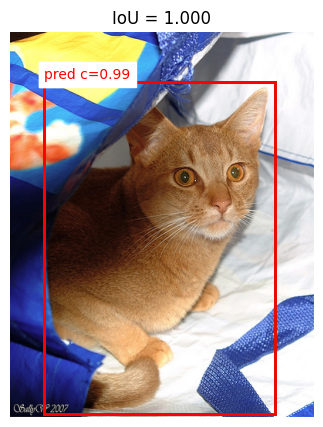

pred 1: confidence=0.88, IoU=0.886, box=[60, 80, 350, 490]


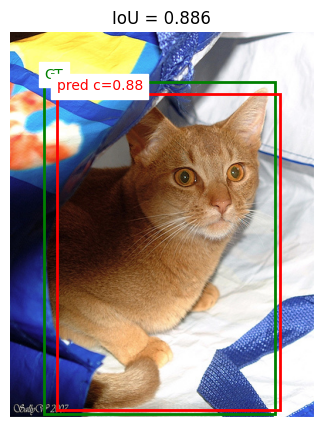

pred 2: confidence=0.55, IoU=0.209, box=[100, 120, 250, 300]


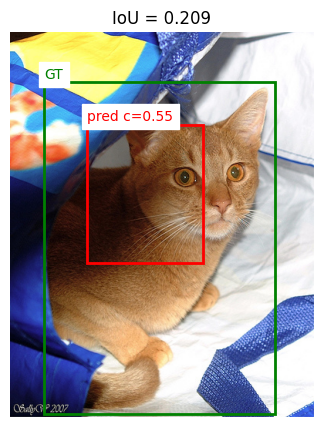

pred 3: confidence=0.40, IoU=0.000, box=[0, 0, 60, 60]


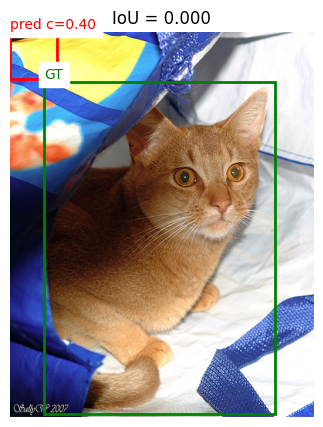

In [48]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

img, seg = dataset[0]
w, h = img.size
bbox_voc = extract_bbox(seg)

# Predicții:
pred = [
    ([44, 65, 344, 495], 0.99),   # good: match perfect cu GT
    ([60, 80, 350, 490], 0.88),   # almost good: ușor deplasată/dimensionată
    ([100, 120, 250, 300], 0.55), # bad: în interiorul GT, dar mult mai mică (IoU ~0.2)
    ([0, 0, 60, 60], 0.40), # non-overlapping: fără suprapunere
]

def show_pred_vs_gt(img, gt_box, pred_box, score, iou):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(img)   # afișăm imaginea

    # GT (verde)
    gx, gy, gx2, gy2 = gt_box
    ax.add_patch(Rectangle((gx, gy), gx2-gx, gy2-gy,
                           fill=False, edgecolor="green", linewidth=2))
    ax.text(gx, gy-5, "GT", color="green", fontsize=10, backgroundcolor="white")

    # Prediction (roșu)
    px, py, px2, py2 = pred_box
    ax.add_patch(Rectangle((px, py), px2-px, py2-py,
                           fill=False, edgecolor="red", linewidth=2))
    ax.text(px, py-5, f"pred c={score:.2f}", color="red", fontsize=10, backgroundcolor="white")

    ax.set_title(f"IoU = {iou:.3f}")
    ax.axis("off")
    plt.show()


#  calculează IoU-urile
def box_iou(box1, box2):
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2
    xi_min = max(x1_min, x2_min)
    yi_min = max(y1_min, y2_min)
    xi_max = min(x1_max, x2_max)
    yi_max = min(y1_max, y2_max)
    inter_w = max(0.0, xi_max - xi_min)
    inter_h = max(0.0, yi_max - yi_min)
    inter_area = inter_w * inter_h
    area1 = max(0.0, x1_max - x1_min) * max(0.0, y1_max - y1_min)
    area2 = max(0.0, x2_max - x2_min) * max(0.0, y2_max - y2_min)
    union_area = area1 + area2 - inter_area
    return (inter_area / union_area) if union_area > 0 else 0.0

for i, (pbox, s) in enumerate(pred):
    iou = box_iou(pbox, bbox_voc)
    print(f"pred {i}: confidence={s:.2f}, IoU={iou:.3f}, box={pbox}")
    show_pred_vs_gt(img, bbox_voc, pbox, s, iou)

### Naive Detector

In [61]:
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from collections import deque

def otsu_threshold(gray_np):
    """
    Compute Otsu's threshold for a uint8 grayscale image (numpy array HxW).
    Returns an integer threshold in [0, 255].
    """
    hist, _ = np.histogram(gray_np.ravel(), bins=256, range=(0, 256))
    total = gray_np.size
    sum_total = np.dot(np.arange(256), hist)

    sum_b, w_b = 0.0, 0.0
    var_max, thresh = 0.0, 0
    for t in range(256):
        w_b += hist[t]
        if w_b == 0:
            continue
        w_f = total - w_b
        if w_f == 0:
            break
        sum_b += t * hist[t]
        m_b = sum_b / w_b
        m_f = (sum_total - sum_b) / w_f
        var_between = w_b * w_f * (m_b - m_f) ** 2
        if var_between > var_max:
            var_max = var_between
            thresh = t
    return int(thresh)

def _largest_connected_component(mask, min_area_ratio=0.002):
    """
    Extrage cea mai mare componentă conexă 4-neighborhood dintr-o mască booleană.
    Returnează: (bbox_tlbr sau None, mask_lcc)
    """
    h, w = mask.shape
    visited = np.zeros_like(mask, dtype=bool)
    best_area = 0
    best_bbox = None
    best_mask = np.zeros_like(mask, dtype=bool)

    # prag minim ca să ignorăm zgomotul (raport din aria imaginii)
    min_area = max(1, int(min_area_ratio * h * w))

    # vecini 4-conexi
    nbrs = [(1,0), (-1,0), (0,1), (0,-1)]

    for y in range(h):
        for x in range(w):
            if not mask[y, x] or visited[y, x]:
                continue
            # BFS pentru componenta curentă
            q = deque([(y, x)])
            visited[y, x] = True
            comp_pixels = [(y, x)]
            ymin = ymax = y
            xmin = xmax = x

            while q:
                cy, cx = q.popleft()
                for dy, dx in nbrs:
                    ny, nx = cy + dy, cx + dx
                    if 0 <= ny < h and 0 <= nx < w and mask[ny, nx] and not visited[ny, nx]:
                        visited[ny, nx] = True
                        q.append((ny, nx))
                        comp_pixels.append((ny, nx))
                        if ny < ymin: ymin = ny
                        if ny > ymax: ymax = ny
                        if nx < xmin: xmin = nx
                        if nx > xmax: xmax = nx

            area = len(comp_pixels)
            if area >= min_area and area > best_area:
                best_area = area
                best_bbox = (int(xmin), int(ymin), int(xmax), int(ymax))
                best_mask[:] = False
                ys, xs = zip(*comp_pixels)
                best_mask[ys, xs] = True

    return best_bbox, best_mask

def naive_threshold_detector(img, method="otsu", fixed_thresh=128, invert=False, blur_radius=0):
    """
    Naive detector “upgraded”: threshold + cea mai mare componentă conexă.
    - img: PIL.Image
    - method: "otsu" or "fixed"
    - fixed_thresh: used if method == "fixed" (0..255)
    - invert: flip foreground/background after threshold
    - blur_radius: optional PIL MedianFilter (reduce noise)

    Returns: bbox_tlbr (xmin, ymin, xmax, ymax) or None, binary_mask (HxW bool), used_threshold
    """
    if blur_radius > 0:
        img_proc = img.filter(ImageFilter.MedianFilter(size=blur_radius*2+1))
    else:
        img_proc = img

    gray = img_proc.convert("L")
    gray_np = np.array(gray, dtype=np.uint8)

    if method == "otsu":
        t = otsu_threshold(gray_np)
    else:
        t = int(fixed_thresh)

    # Foreground = pixels > t
    mask = (gray_np > t)
    if invert:
        mask = ~mask

    # păstrăm doar cea mai mare componentă conexă semnificativă
    bbox_raw, mask_lcc = _largest_connected_component(mask, min_area_ratio=0.002)

    if bbox_raw is None:
        return None, mask_lcc, t

    xmin, ymin, xmax, ymax = bbox_raw
    # include marginea maximă a pixelilor în bbox (de la index la coordonată finală)
    return (xmin, ymin, xmax, ymax), mask_lcc, t

def show_naive_detection(index, method="otsu", fixed_thresh=128, invert=False, blur_radius=0):
    """
    Visualize naive threshold detection on a dataset sample:
    left = image with bbox, right = cleaned mask (largest component).
    """
    img, _ = dataset[index]  # detector uses only the raw image
    bbox, mask, t = naive_threshold_detector(
        img, method=method, fixed_thresh=fixed_thresh, invert=invert, blur_radius=blur_radius
    )

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Left: image + bbox
    axes[0].imshow(img)
    if bbox is not None:
        xmin, ymin, xmax, ymax = bbox
        axes[0].add_patch(
            Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, linewidth=2, edgecolor="red")
        )
        axes[0].set_title(f"Detected bbox (t={t})")
    else:
        axes[0].set_title(f"No detection (t={t})")
    axes[0].axis("off")

    # Right: cleaned mask (largest component)
    axes[1].imshow(mask, cmap="gray")
    axes[1].set_title("Largest connected component")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()


### Evaluate naive detector

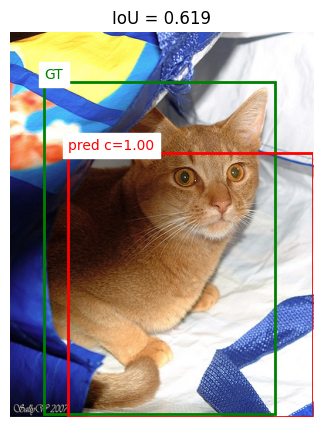

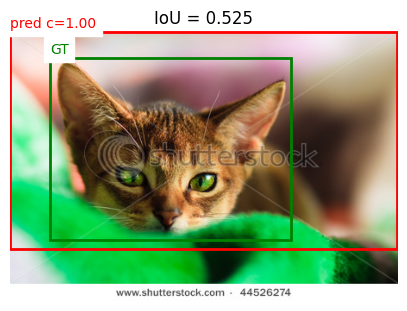

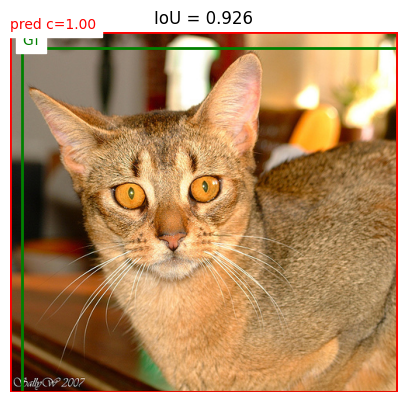

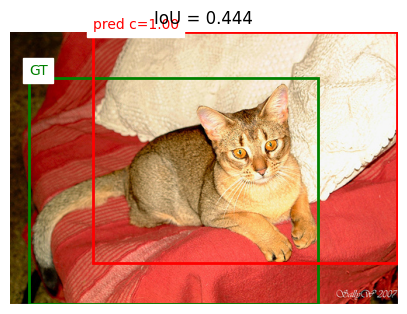

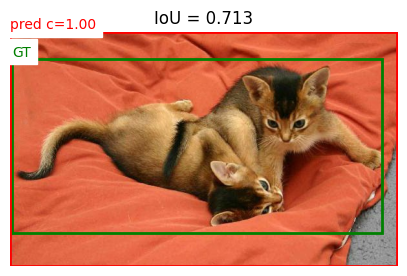

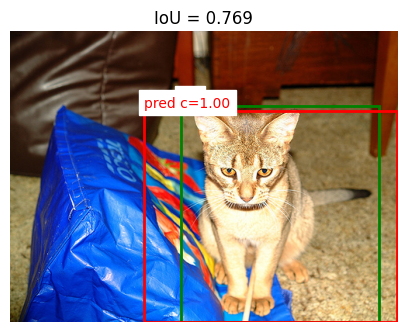

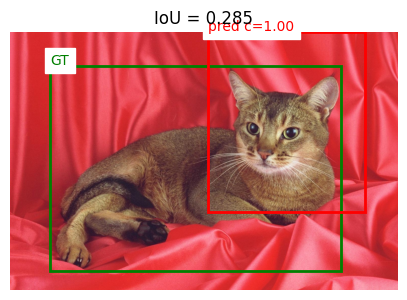

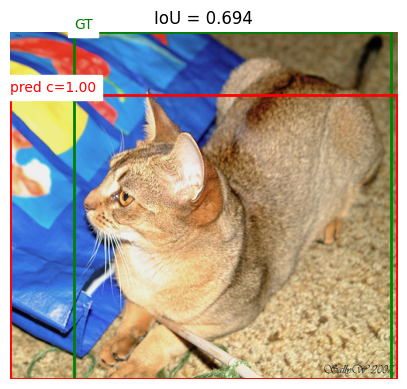

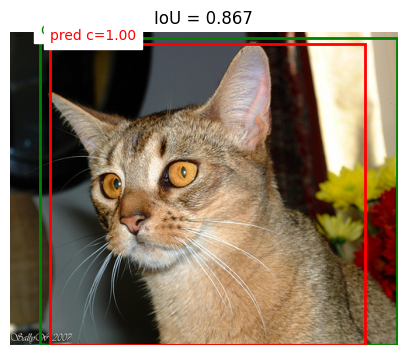

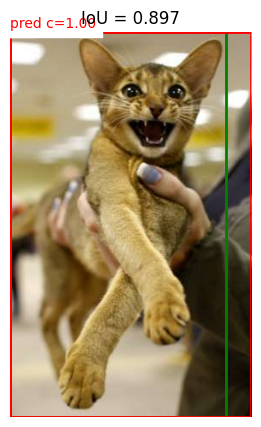

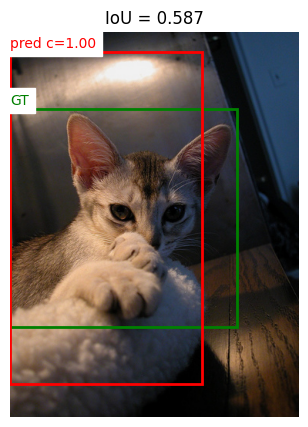

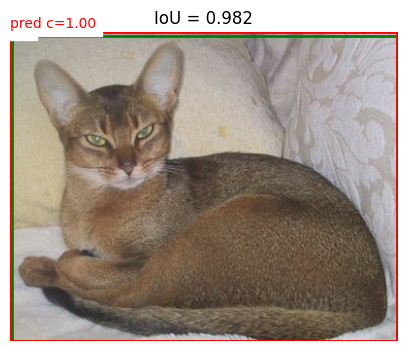

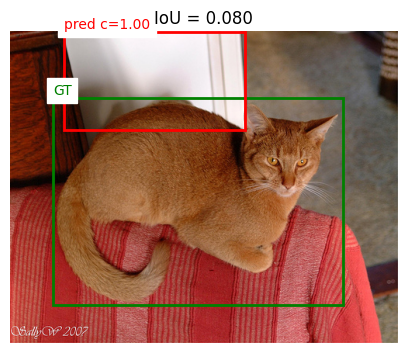

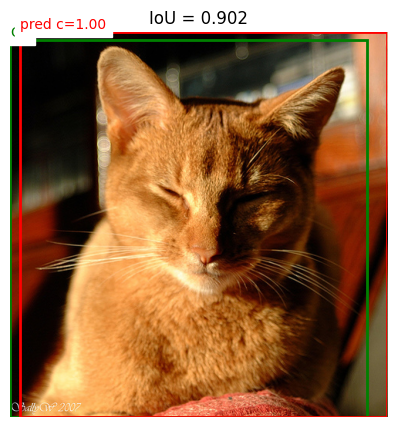

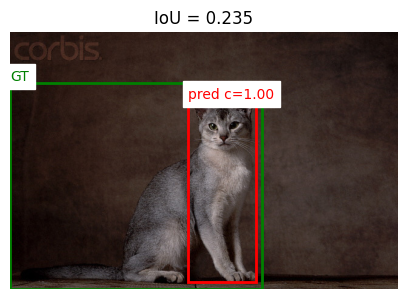

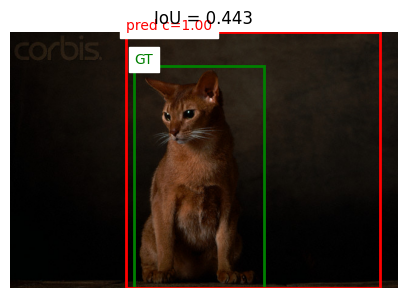

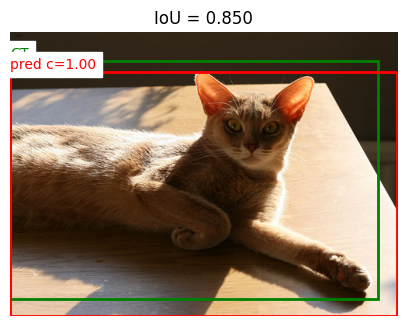

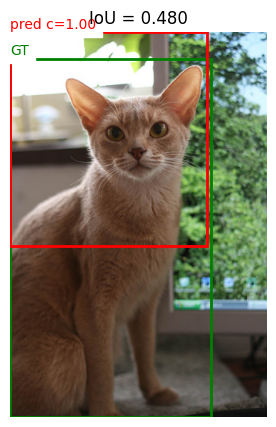

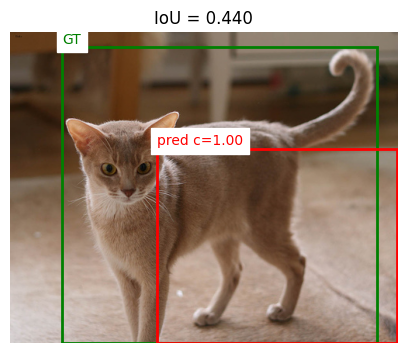

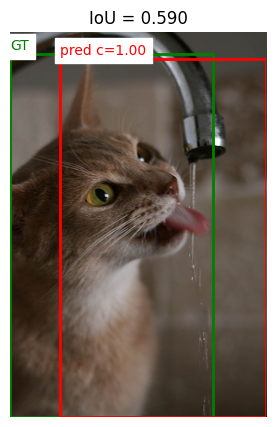

Precision: 0.550
Recall: 0.550
F1: 0.550
AP: 0.380


In [64]:
gt_boxes = []
pred_boxes = []
for i in range(20):
    img, seg = dataset[i]
    gt_box = extract_bbox(seg)                 # TLBR (Pascal VOC) in pixels
    pred_box, mask, t = naive_threshold_detector(img, method="otsu", invert=False, blur_radius=0)
    full_pred = (pred_box, 1.0)

    iou = box_iou(gt_box, pred_box)
    show_pred_vs_gt(img, gt_box, pred_box, 1.0, iou)

    gt_boxes.append(gt_box)
    pred_boxes.append(full_pred)

precision, recall, f1, ap, ap = evaluate_predictions(gt_boxes, pred_boxes, iou_threshold=0.5)
print(f"Precision: {precision[-1]:.3f}")
print(f"Recall: {recall[-1]:.3f}")
print(f"F1: {f1:.3f}")
print(f"AP: {ap:.3f}")

<p>
<font color="red"><b>❓ De ce in acest caz obtine Recall == Precision?</b></font>
</p>

# NMS (Non-Maximum Supression)

Modelele de detecție produc adesea mai multe cutii pentru același
obiect, fiecare cu un scor de încredere. Pentru a elimina aceste
suprapuneri redundante aplicăm algoritmul de **Non‑Maximum
Suppression**. Ideea este să păstrăm cutia cu scorul cel mai mare și să
eliminăm cutiile care au o suprapunere mare cu aceasta (IoU peste un
prag). Algoritmul de bază este:

1. Se generează toate bounding box‑urile și scorurile.
2. Se sortează descrescător după scor.
3. Se selectează cutia cu scor maxim și se adaugă la rezultate.
4. Se calculează IoU cu celelalte cutii și se elimină acelea cu IoU
   peste un prag da
5. Se repetă până nu mai rămân cutii.

Tutorial: https://learnopencv.com/non-maximum-suppression-theory-and-implementation-in-pytorch/

In [65]:
def nms(boxes, scores, iou_threshold=0.5, score_threshold=None, max_dets=None):
    """
    Greedy NMS standard (class-agnostic).
    boxes: np.ndarray shape (N, 4) in TLBR = [xmin, ymin, xmax, ymax]
    scores: np.ndarray shape (N,)
    iou_threshold: suprapuneri > acest prag sunt suprimate
    score_threshold: opțional, filtrează detecțiile cu scor mic înainte de NMS
    max_dets: opțional, taie la primele K detecții păstrate
    return: indices (lista de indexuri păstrate în ordinea selectării)
    """
    if len(boxes) == 0:
        return []

    boxes = boxes.astype(float)
    scores = scores.astype(float)

    # filtrare după scor (opțional)
    if score_threshold is not None:
        keep_mask = scores >= score_threshold
        boxes = boxes[keep_mask]
        scores = scores[keep_mask]
        if len(boxes) == 0:
            return []

        # Vom avea nevoie să mapăm înapoi indexurile originale
        original_idx = np.nonzero(keep_mask)[0]
    else:
        original_idx = np.arange(len(boxes))

    # sortare descendentă după scor
    order = np.argsort(-scores)
    keep_local = []

    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    # arii
    areas = np.clip(x2 - x1, 0, None) * np.clip(y2 - y1, 0, None)

    while order.size > 0:
        i = order[0]
        keep_local.append(i)
        if max_dets is not None and len(keep_local) >= max_dets:
            break

        # iou între boxa curentă și restul
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        w = np.clip(xx2 - xx1, 0, None)
        h = np.clip(yy2 - yy1, 0, None)
        inter = w * h
        union = areas[i] + areas[order[1:]] - inter
        iou = np.where(union > 0, inter / union, 0.0)

        # păstrăm doar cutiile cu IoU <= prag (cele > prag se elimină)
        remain = np.where(iou <= iou_threshold)[0]
        order = order[remain + 1]

    # mapăm la indexurile originale
    keep = original_idx[np.array(keep_local, dtype=int)].tolist()
    return keep

def nms_on_preds(pred_boxes, iou_threshold=0.5, score_threshold=None, max_dets=None):
    """
    pred_boxes: list of (box, score) cu box în TLBR
    return: list of (box, score) păstrate (ordonate descrescător după scor)
    """
    if not pred_boxes:
        return []

    boxes = np.array([b for b, s in pred_boxes], dtype=float)
    scores = np.array([s for b, s in pred_boxes], dtype=float)

    keep_idx = nms(boxes, scores, iou_threshold, score_threshold, max_dets)
    # reordonăm după scor desc (cum au fost selectate)
    pred_sorted = sorted([(i, pred_boxes[i][0], pred_boxes[i][1]) for i in keep_idx],
                         key=lambda x: x[2], reverse=True)
    return [(box, score) for _, box, score in pred_sorted]

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def show_boxes_on_canvas(boxes, scores=None, canvas_size=(160, 160),
                         colors=('red', 'blue', 'green'), title='Overlapping boxes'):
    boxes = np.asarray(boxes, dtype=float)
    H, W = canvas_size
    img = np.ones((H, W, 3), dtype=np.uint8) * 255  # white background

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(img)

    for i, (x1, y1, x2, y2) in enumerate(boxes):
        color = colors[i % len(colors)]
        ax.add_patch(Rectangle((x1, y1), x2 - x1, y2 - y1,
                               fill=False, edgecolor=color, linewidth=2))
        label = f"{i}"
        if scores is not None:
            label += f": {scores[i]:.2f}"
        ax.text(x1, max(0, y1 - 4), label, fontsize=9, color='black',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    ax.set_title(title)
    ax.axis('off')
    plt.show()


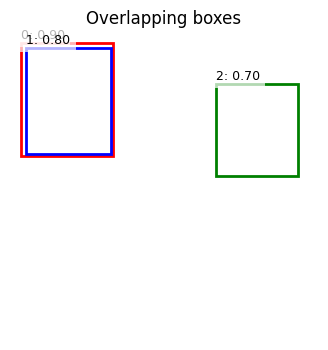

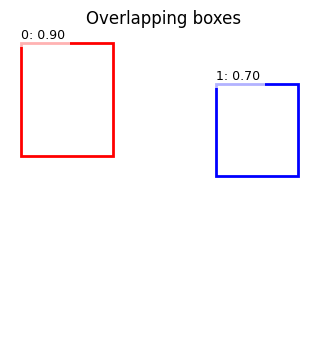

In [79]:
# boxes și scores ca NumPy arrays
boxes = np.array([[10,10,100,120],[15,15,98,118],[200,50,280,140]], dtype=float)
scores = np.array([0.9, 0.8, 0.7], dtype=float)
show_boxes_on_canvas(boxes, scores, canvas_size=(300,300))

keep = nms(boxes, scores, iou_threshold=0.5)
boxes_kept = boxes[keep]
scores_kept = scores[keep]
show_boxes_on_canvas(boxes_kept, scores_kept, canvas_size=(300,300))